# CERT summary of incidents 2008-2017

**Importing Libraries**

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

**Loading the dataset**


In [54]:
data=pd.read_csv("/content/CERT summary of incidents 2008-2017.csv")

In [55]:
data.head()

,Type of Incident,Year 2008,Year 2009,Year 2010,Year 2011,Year 2012,Year 2013,Year 2014,Year 2015,Year 2016,Year 2017
0,Phishing,5,10,6,6,8,8,12,14,23,42
1,Abuse/Privacy,3,10,20,2,8,8,8,5,32,29
2,Ransomware,0,0,0,0,0,0,0,0,10,15
3,Scams,5,11,10,3,6,18,12,18,12,32
4,Financial Frauds,0,0,0,0,0,0,0,12,16,35


**Understand the shape of the dataset.**

In [56]:
data.shape

(16, 11)

In [57]:
data.columns

Index(['Type of Incident', 'Year 2008', 'Year 2009', 'Year 2010', 'Year 2011',
       'Year 2012', 'Year 2013', 'Year 2014', 'Year 2015', 'Year 2016',
       'Year 2017'],
      dtype='object')

Rename Columns

In [58]:
data.rename(columns={'Year 2008':'2008'}, inplace=True)
data.rename(columns={'Year 2009':'2009'}, inplace=True)
data.rename(columns={'Year 2010':'2010'}, inplace=True)
data.rename(columns={'Year 2011':'2011'}, inplace=True)
data.rename(columns={'Year 2012':'2012'}, inplace=True)
data.rename(columns={'Year 2013':'2013'}, inplace=True)
data.rename(columns={'Year 2014':'2014'}, inplace=True)
data.rename(columns={'Year 2015':'2015'}, inplace=True)
data.rename(columns={'Year 2016':'2016'}, inplace=True)
data.rename(columns={'Year 2017':'2017'}, inplace=True)

In [59]:
data.columns

Index(['Type of Incident', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017'],
      dtype='object')

**Check the datatype**

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Type of Incident  16 non-null     object
 1   2008              16 non-null     int64 
 2   2009              16 non-null     int64 
 3   2010              16 non-null     int64 
 4   2011              16 non-null     int64 
 5   2012              16 non-null     int64 
 6   2013              16 non-null     int64 
 7   2014              16 non-null     int64 
 8   2015              16 non-null     int64 
 9   2016              16 non-null     int64 
 10  2017              16 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 1.5+ KB


In [61]:
data.dtypes

Type of Incident    object
2008                 int64
2009                 int64
2010                 int64
2011                 int64
2012                 int64
2013                 int64
2014                 int64
2015                 int64
2016                 int64
2017                 int64
dtype: object

# Data Cleaning

Count the number of missing or null values

In [62]:
data.isnull().sum()

Type of Incident    0
2008                0
2009                0
2010                0
2011                0
2012                0
2013                0
2014                0
2015                0
2016                0
2017                0
dtype: int64

In [63]:
data.isnull().sum()

Type of Incident    0
2008                0
2009                0
2010                0
2011                0
2012                0
2013                0
2014                0
2015                0
2016                0
2017                0
dtype: int64

Count duplicate rows  

In [64]:
data.duplicated().sum()

0

Clean the 'Type of Incident' column by trimming trailing spaces

In [65]:
data['Type of Incident'] = data['Type of Incident'].str.strip()

In [65]:
data.head()


# Exploratory Analysis

In [66]:
data.describe()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,16.00000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,3.06250,4.312500,9.437500,91.812500,71.875000,79.687500,7.375000,5.937500,8.812500,13.875000
std,4.37369,5.570383,19.738182,355.550881,274.199897,298.809353,13.749545,7.037696,9.495394,15.125585
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,0.000000,2.500000,1.500000,1.500000,2.500000,3.000000,3.000000,8.500000,10.000000
75%,5.00000,10.000000,10.000000,3.500000,6.500000,8.750000,8.500000,10.500000,13.000000,26.000000
max,14.00000,15.000000,80.000000,1425.000000,1100.000000,1200.000000,56.000000,20.000000,32.000000,42.000000


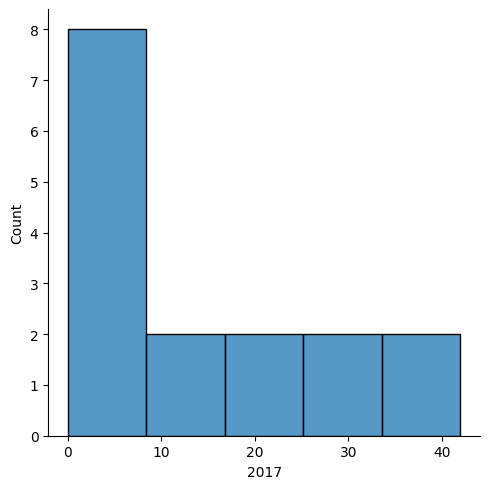

In [145]:
sns.displot(data['2017'])
plt.show()

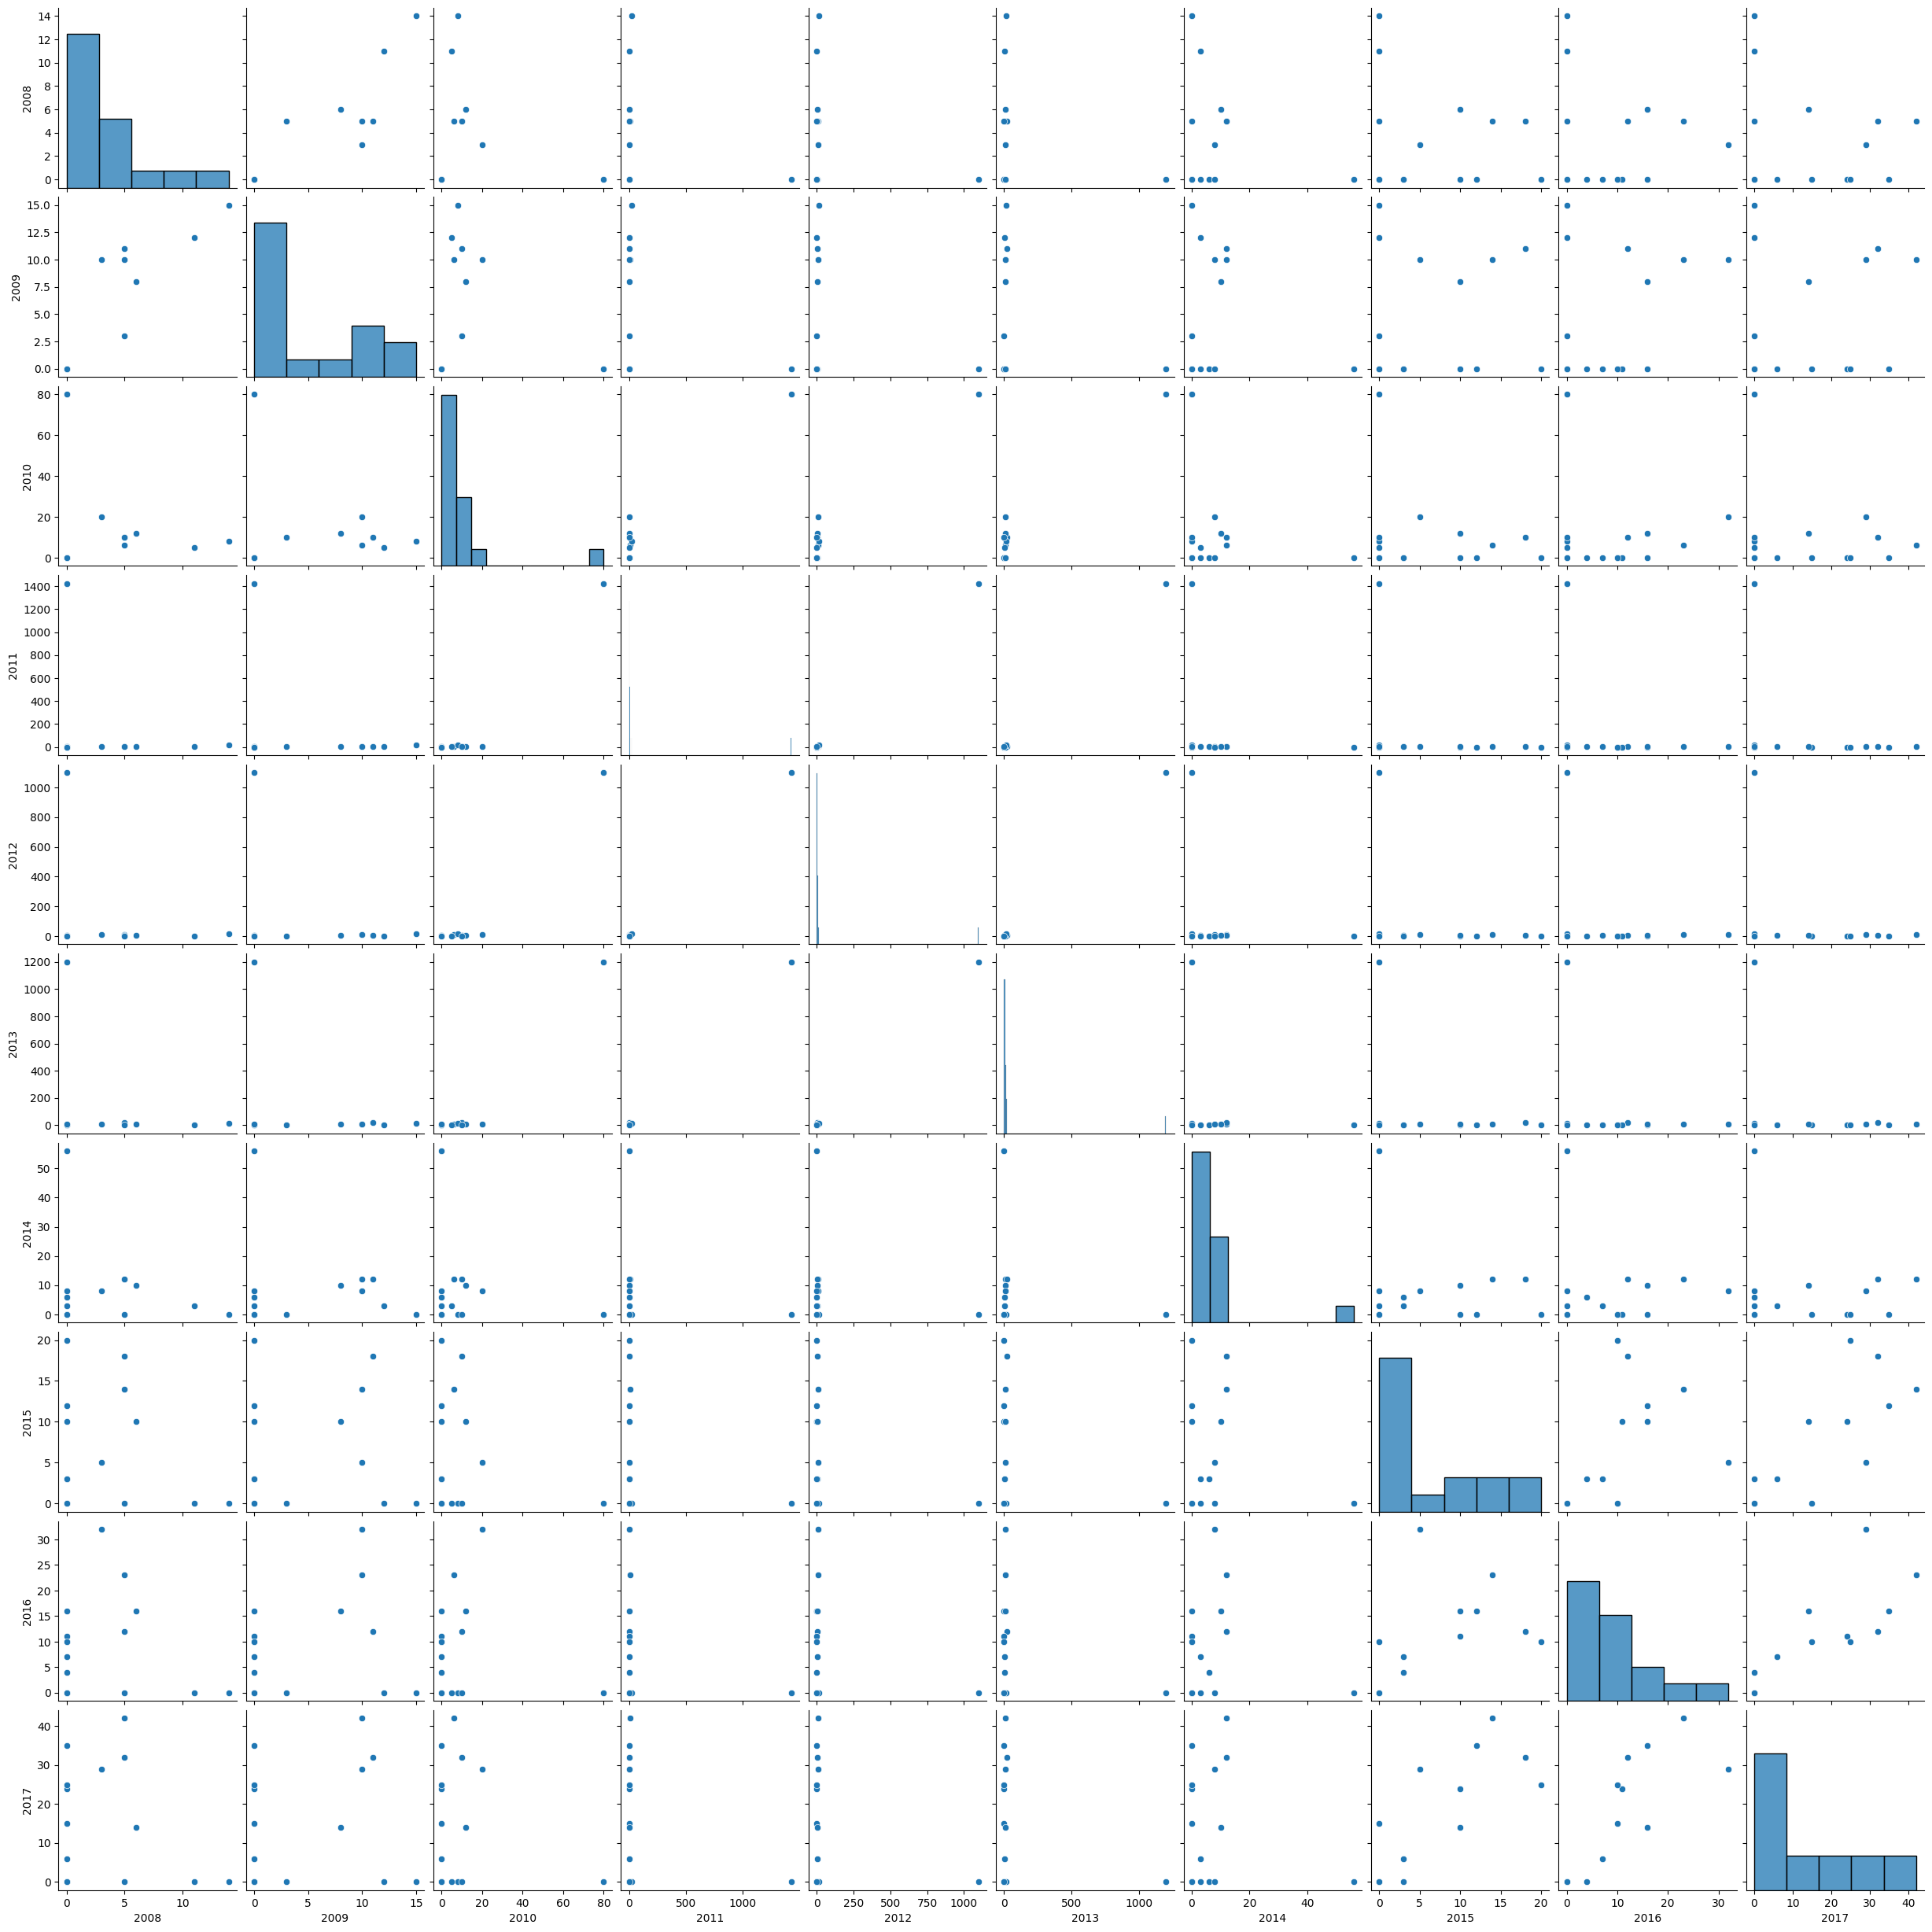

In [68]:
sns.pairplot(data)
plt.show()

In [69]:
data.corr('spearman')

<ipython-input-69-af2b41bccd84>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr('spearman')


,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
2008,1.000000,0.957851,0.629380,0.536442,0.594187,0.396992,0.199114,-0.025507,0.041812,-0.027164
2009,0.957851,1.000000,0.629422,0.523297,0.639330,0.472772,0.259681,0.040701,0.121762,0.086352
2010,0.629380,0.629422,1.000000,0.723557,0.825980,0.633125,0.125851,-0.035341,0.121254,0.000000
2011,0.536442,0.523297,0.723557,1.000000,0.930578,0.698673,0.071380,-0.071323,-0.046766,-0.107604
2012,0.594187,0.639330,0.825980,0.930578,1.000000,0.790335,0.171045,-0.015034,0.097276,-0.012640
2013,0.396992,0.472772,0.633125,0.698673,0.790335,1.000000,0.318582,-0.053054,-0.031932,-0.088546
2014,0.199114,0.259681,0.125851,0.071380,0.171045,0.318582,1.000000,0.181014,0.237378,0.120482
2015,-0.025507,0.040701,-0.035341,-0.071323,-0.015034,-0.053054,0.181014,1.000000,0.799320,0.844303
2016,0.041812,0.121762,0.121254,-0.046766,0.097276,-0.031932,0.237378,0.799320,1.000000,0.915652
2017,-0.027164,0.086352,0.000000,-0.107604,-0.012640,-0.088546,0.120482,0.844303,0.915652,1.000000


<ipython-input-70-674aab463115>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr('spearman'),vmin=1,vmax=1,annot=True)


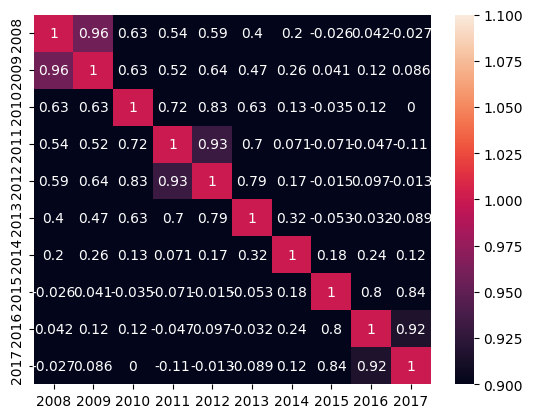

In [70]:
sns.heatmap(data.corr('spearman'),vmin=1,vmax=1,annot=True)
plt.show()

# Machine Learning

In [71]:
data.head()

,Type of Incident,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Phishing,5,10,6,6,8,8,12,14,23,42
1,Abuse/Privacy,3,10,20,2,8,8,8,5,32,29
2,Ransomware,0,0,0,0,0,0,0,0,10,15
3,Scams,5,11,10,3,6,18,12,18,12,32
4,Financial Frauds,0,0,0,0,0,0,0,12,16,35


In [73]:
# Calculate the total number of incidents for each type across all years
data['Total Incidents'] = data.iloc[:, 1:].sum(axis=1)

# Sort the types of incidents based on 'Total Incidents' to find the top 5
top_5_incidents = data[['Type of Incident', 'Total Incidents']].sort_values(by='Total Incidents', ascending=False).head(5)

# Display the top 5 types of incidents
print(top_5_incidents)

    Type of Incident  Total Incidents
14     Fake Accounts             3805
0           Phishing              134
3              Scams              127
1      Abuse/Privacy              125
7   Hate/Threat Mail               93


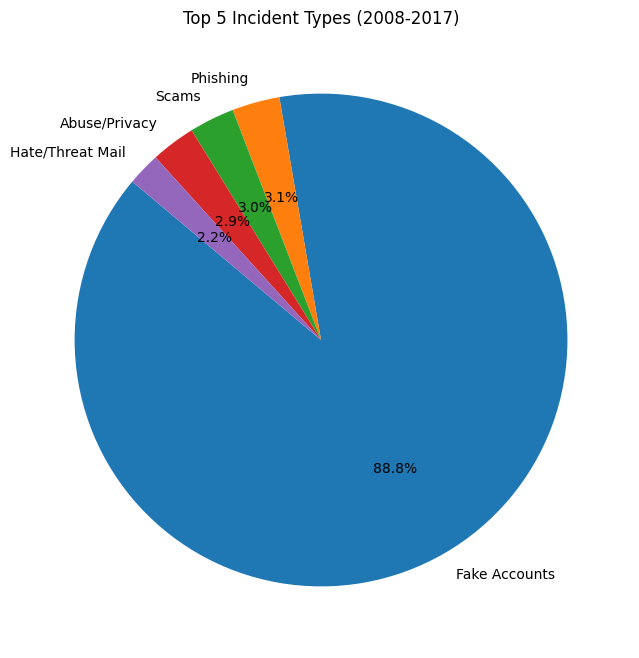

In [77]:
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_5_incidents['Total Incidents'], labels=top_5_incidents['Type of Incident'], autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Incident Types (2008-2017)')
plt.show()

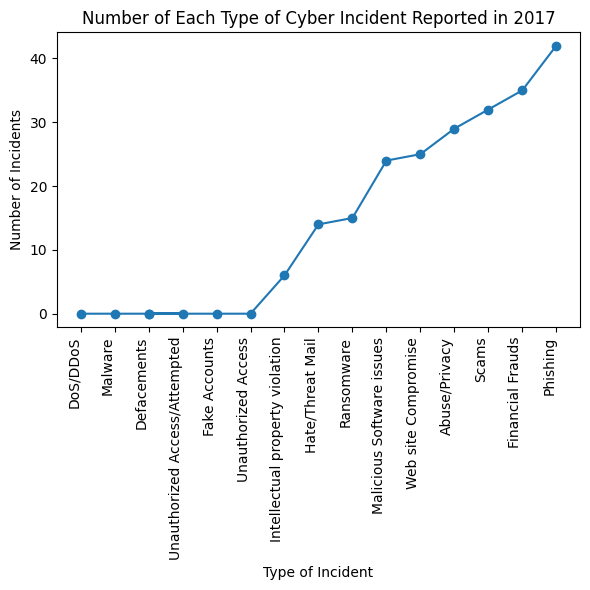

In [86]:
# Extract the types of incidents and their counts for the year 2017
incidents_2017 = data[['Type of Incident', '2017']]
incidents_2016 = data[['Type of Incident', '2016']]

# Sort the incidents for better visualization
incidents_2017_sorted = incidents_2017.sort_values('2017')
incidents_2016_sorted = incidents_2016.sort_values('2016')

# Plotting
plt.figure(figsize=(6, 6))
plt.plot(incidents_2017_sorted['Type of Incident'], incidents_2017_sorted['2017'], marker='o', linestyle='-')

plt.title('Number of Each Type of Cyber Incident Reported in 2017')
plt.xlabel('Type of Incident')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=90, ha='right')  # Rotate labels to fit them better
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

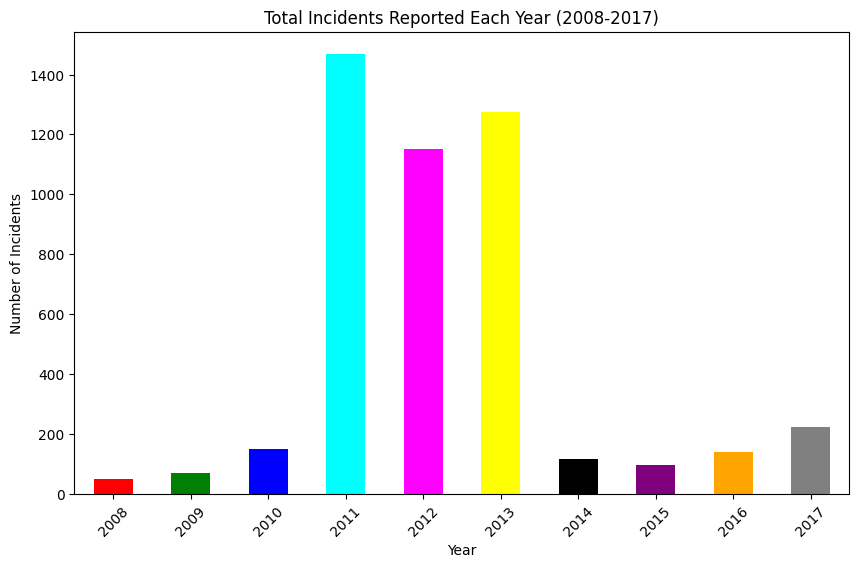

In [101]:
# Summing up the incidents reported each year
total_incidents_yearly = data.iloc[:, 1:11].sum()

# Plotting the total incidents reported each year
colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'orange', 'grey']
plt.figure(figsize=(10, 6))
total_incidents_yearly.plot(kind='bar', color=colors)
plt.title('Total Incidents Reported Each Year (2008-2017)')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)

plt.show()

In [104]:
total_incidents_yearly[0:11]

2008      49
2009      69
2010     151
2011    1469
2012    1150
2013    1275
2014     118
2015      95
2016     141
2017     222
dtype: int64

Get column values in total_incidents_yearly

In [126]:
x=np.array(total_incidents_yearly[0:11].index)
y=np.array(total_incidents_yearly[0:11].values)

# Data Modeling

Train and Test data set

In [132]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [143]:
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)


# Linear Regression

In [134]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [135]:
lm.coef_

array([[-9.91976517]])

In [137]:
lm.intercept_

array([20518.16242661])

In [138]:
lm.score(x_train,y_train)

0.002316344172230367

In [139]:
y_pred=lm.predict(x_test)
y_pred

array([[579.43444227],
       [519.91585127]])

In [140]:
np.sqrt(mean_squared_error(y_test,y_pred))

404.4337360238722

In [142]:
x=np.array([2018])
x=x.reshape(-1,1)

y_pred=lm.predict(x)
y_pred

array([[500.07632094]])